In [47]:
import torch
from torch import nn, optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from tqdm.auto import tqdm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Define your model, optimizer, and data loader
model = nn.Sequential(nn.Flatten(), nn.Linear(28*28, 128), nn.ReLU(), nn.Linear(128, 10))
model.to(device)
optimizer = optim.SGD(model.parameters(), lr=0.05)
train_loader = DataLoader(
    datasets.MNIST('.', train=True, download=True, transform=transforms.ToTensor()),
    batch_size=1024,
    shuffle=True
)

test_loader = DataLoader(
    datasets.MNIST('.', train=False, download=True, transform=transforms.ToTensor()),
    batch_size=1024,
    shuffle=True
)



In [48]:
# Training loop
for epoch in range(20):
    for data, target in tqdm(train_loader):
        data = data.to(device)
        target = target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = nn.functional.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
    with torch.no_grad():
      accuracy = 0
      for data, target in tqdm(test_loader):
        data = data.to(device)
        target = target.to(device)
        output = model(data)
        preds = torch.argmax(output,1)
        accuracy += torch.sum(preds == target)
      print(f"Accuracy: {accuracy/len(test_loader.dataset)}")





  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Accuracy: 0.76419997215271


  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Accuracy: 0.8324999809265137


  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Accuracy: 0.8611999750137329


  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Accuracy: 0.8759999871253967


  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Accuracy: 0.8852999806404114


  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Accuracy: 0.8926999568939209


  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Accuracy: 0.8953999876976013


  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Accuracy: 0.9001999497413635


  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Accuracy: 0.9004999995231628


  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Accuracy: 0.9024999737739563


  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Accuracy: 0.9049999713897705


  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Accuracy: 0.9071999788284302


  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Accuracy: 0.9089999794960022


  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Accuracy: 0.910099983215332


  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Accuracy: 0.9111999869346619


  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Accuracy: 0.9138000011444092


  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Accuracy: 0.9151999950408936


  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Accuracy: 0.9160999655723572


  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Accuracy: 0.9177999496459961


  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Accuracy: 0.9192000031471252


In [49]:
# Now get Scores
train_loader = DataLoader(
    datasets.MNIST('.', train=True, download=True, transform=transforms.ToTensor()),
    batch_size=1,
    shuffle=True
)

test_loader = DataLoader(
    datasets.MNIST('.', train=False, download=True, transform=transforms.ToTensor()),
    batch_size=1,
    shuffle=True
)

scoresIn = []
scoresOut = []
scores = []
model.to('cpu')
with torch.no_grad():
  for data, target in tqdm(train_loader):

    output = model(data)
    loss = nn.functional.cross_entropy(output, target)
    scoresIn.append(loss.item())

  # did not train on these
  for data, target in tqdm(test_loader):
    output = model(data)
    loss = nn.functional.cross_entropy(output, target)
    scoresOut.append(loss.item())

scores = scoresIn
scores.extend(scoresOut)
scoresdf = pd.DataFrame({'scores' : scores})

  0%|          | 0/60000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

In [51]:
scoresdf['train'] = scoresdf.index.isin(range(len(train_loader)))

Text(0.5, 0, 'Index')

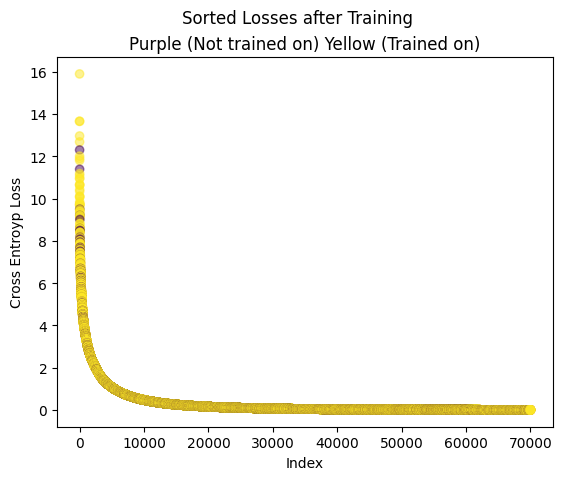

In [52]:
import matplotlib.pyplot as plt

scores_sorted = scoresdf.sort_values('scores', ascending = False).reset_index()
plt.scatter(scores_sorted.index, scores_sorted['scores'],
            c = scores_sorted['train'], alpha = 0.5)
plt.suptitle("Sorted Losses after Training")
plt.title("Purple (Not trained on) Yellow (Trained on)")
plt.ylabel("Cross Entroyp Loss")
plt.xlabel("Index")

In [153]:
gradient = scores_sorted['scores'].diff()
gradient = np.convolve(gradient, np.ones((50,))/50, mode='valid') # convolve to denoise
changing_quickly = np.abs(gradient) < np.mean(np.abs(gradient[1:]))
changing_quickly = pd.Series(np.where(changing_quickly == False, None, changing_quickly))
r = changing_quickly.first_valid_index()
r

4737

### Auditing Our Example

In [54]:
import scipy
import math
def p_value_DP_audit(m, r, v, eps, delta = 1e-5):
    """args: delta a float between 0 and 1"""
    assert 0 <= v <= r <= m
    assert eps >= 0
    assert 0 <= delta <= 1

    q = 1/(1 + math.exp(-eps))  # accuracy of eps-DP randomized response
    beta = scipy.stats.binom.sf(v-1, r, q)  # P[Binomial(r, q) >= v]
    alpha = 0
    sum_prob = 0  # P[v > Binomial(r, q) >= v - i]

    for i in range(1, v + 1):
        sum_prob += scipy.stats.binom.pmf(v - i, r, q)
        if sum_prob > i * alpha:
            alpha = sum_prob / i

    p = beta + alpha * delta * 2 * m
    return min(p, 1)

def get_eps_audit(m, r, v, p, delta = 1e-5):
    """args: delta a float between 0 and 1"""
    assert 0 <= v <= r <= m
    assert 0 <= delta <= 1
    assert 0 < p < 1

    eps_min = 0  # maintain p_value_DP(eps_min) < p
    eps_max = 1  # maintain p_value_DP(eps_max) >= p

    while p_value_DP_audit(m, r, v, eps_max, delta) < p:
        eps_max += 1

    for _ in range(30):  # binary search
        eps = (eps_min + eps_max) / 2
        if p_value_DP_audit(m, r, v, eps, delta) < p:
            eps_min = eps
        else:
            eps_max = eps

    return eps_min



In [155]:

## get the guesses
not_included_correct = (scores_sorted.iloc[:r]['train'] == False).sum()
included_correct = (scores_sorted.iloc[-r:]['train'] == True).sum()

total_correct = not_included_correct + included_correct

### now estimate epsilon
get_eps_audit(60000 + 10000, 2*r, total_correct, 0.05)

0

## Reduced Samples

In [178]:
scores_sample = scores_sorted.sample(int(1e2)).sort_index()
gradient = scores_sample['scores'].diff()
gradient = np.convolve(gradient, np.ones((50,))/50, mode='valid') # convolve to denoise
changing_quickly = np.abs(gradient) < np.mean(np.abs(gradient[1:]))
changing_quickly = pd.Series(np.where(changing_quickly == False, None, changing_quickly))
r = changing_quickly.first_valid_index()


In [179]:

## get the guesses
not_included_correct = (scores_sample.iloc[:r]['train'] == False).sum()
included_correct = (scores_sorted.iloc[-r:]['train'] == True).sum()

total_correct = not_included_correct + included_correct

### now estimate epsilon
get_eps_audit(int(1e3), 2*r, total_correct, 0.05)

0